
# PUBG - Introduction

![Imgur](https://i.imgur.com/NmskNuo.jpg)

**PUBG (Player Unknown's Battlegrounds)** is a hugely successful and popular online shooter game. It's of so-called "battle royale" type - the game ends when the last team stays alive on a map.  The difference to the normal deathmatch is that after you are killed in battle royale game you're not re-spawned anymore (perma-death). Here is the [official game site](https://www.pubg.com/).
At the moment this competition was launched there were only two maps: "Erangel" and "Miramar". Currently, there is "Vikendi" as well but it is not included in our dataset.

There were few datasets regarding this game on Kaggle before. If you want for example to see my non-parametric Survival Analysis (Kaplan-Meier) click [here](https://www.kaggle.com/datark1/pubg-survival-analysis-kaplan-meier).

This kernel is mostly EDA oriented but we will look for some anomalies as well ( possibly cheaters).

#### **Content:**
* 1-[Database description](#1)
* 2-[Exploratory Analysis](#2)
    * a-[Match types](#3)
    * b-[Kills and damage dealt](#4)
    * c-[Maximum distances](#5)
    * d-[Driving vs. Walking](#6)
    * e-[Weapons acquired](#7)
    * f-[Correlation map](#8)
* 3-[Analysis of TOP10% of players](#9)

## 1-Database description [^](#1) <a id="1"></a> <br>

OK, let's see what's inside. I will load some basic libraries first.

In [1]:
import numpy as np                    #linear algebra
import pandas as pd                   #dtabase manipulation
import matplotlib.pyplot as plt       #plotting libraries
import seaborn as sns                 #nice graphs and plots
import warnings                       #libraries to deal with warnings
warnings.filterwarnings("ignore")

Reading raw training data.

In [2]:
train = pd.read_csv('../input/train_V2.csv')

The first glance at the data. Below the first 5 rows:

In [3]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
train.shape

(4446966, 29)

In total we have:
* 29 columns
* 4 446 966 observations (rows)

Now - list of columns.

In [5]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')


For better understanding of database below there is a columns descriptions:

*     **groupId** - Players team ID
*     **matchId** - Match ID
*     **assists** - Number of assisted kills. The killed is actually scored for the another teammate.
*     **boosts** - Number of boost items used by a player. These are for example: energy dring, painkillers, adrenaline syringe.
*     **damageDealt** - Damage dealt to the enemy
*     **DBNOs** - Down But No Out - when you lose all your HP but you're not killed yet. All you can do is only to crawl.
*     **headshotKills** - Number of enemies killed with a headshot
*     **heals** - Number of healing items used by a player. These are for example: bandages, first-aid kits
*     **killPlace** - Ranking in a match based on kills.
*     **killPoints** - Ranking in a match based on kills points.
*     **kills** - Number of enemy players killed.
*     **killStreaks** - Max number of enemy players killed in a short amount of time.
*     **longestKill** - Longest distance between player and killed enemy.
*     **matchDuration** - Duration of a mach in seconds.
*     **matchType** - Type of match. There are three main modes: Solo, Duo or Squad. In this dataset however we have much more categories.
*     **maxPlace** - The worst place we in the match.
*     **numGroups** - Number of groups (teams) in the match.
*     **revives** - Number of times this player revived teammates.
*     **rideDistance** - Total distance traveled in vehicles measured in meters.
*     **roadKills** - Number of kills from a car, bike, boat, etc.
*     **swimDistance** - Total distance traveled by swimming (in meters).
*     **teamKills** - Number teammate kills (due to friendly fire).
*     **vehicleDestroys** - Number of vehicles destroyed.
*     **walkDistance** - Total distance traveled on foot measured (in meters).
*     **weaponsAcquired** - Number of weapons picked up.
*     **winPoints** - Ranking in a match based on won matches.

And our target column:
*     **winPlacePerc** - Normalised placement (rank). The 1st place is 1 and the last one is 0.



Let's create some basic descriptive statistics for each column. These will be usefull to set the visualisation parameters, to filter out the outliers and to get the feeling about the ranges/scales.

In [6]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


Now, let's check if there are any missing data.

In [7]:
train.isna().sum().to_frame()

,0
Id,0
groupId,0
matchId,0
assists,0
boosts,0
damageDealt,0
DBNOs,0
headshotKills,0
heals,0
killPlace,0


## 2-Exploratory Data Analysis [^](#2) <a id="2"></a> <br>
Nice - it looks we do not have any missing values. That's a perfect starting point for EDA and for ML as well.
### a) Match types [^](#3) <a id="3"></a> <br>

In [8]:
no_matches = train.loc[:,"matchId"].nunique()
print("There are {} matches registered in our database.".format(no_matches))

There are 47965 matches registered in our database.


In [9]:
m_types = train.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,1756186
1,duo-fpp,996691
2,squad,626526
3,solo-fpp,536762
4,duo,313591
5,solo,181943
6,normal-squad-fpp,17174
7,crashfpp,6287
8,normal-duo-fpp,5489
9,flaretpp,2505


In PUBG there are essentially three main modes of game: **Solo**, **Duo** and **Squad**. 

In a squad mode, you play in a group of 4 players. Here we can see that the match types are further broken down taking into account view modes:
* FPP - First Person Perspective
* TPP - Thirst Peron Perspective
* Normal - you can switch between views during a game
However, I am not able to identify what flare- and crash- types of matches are.

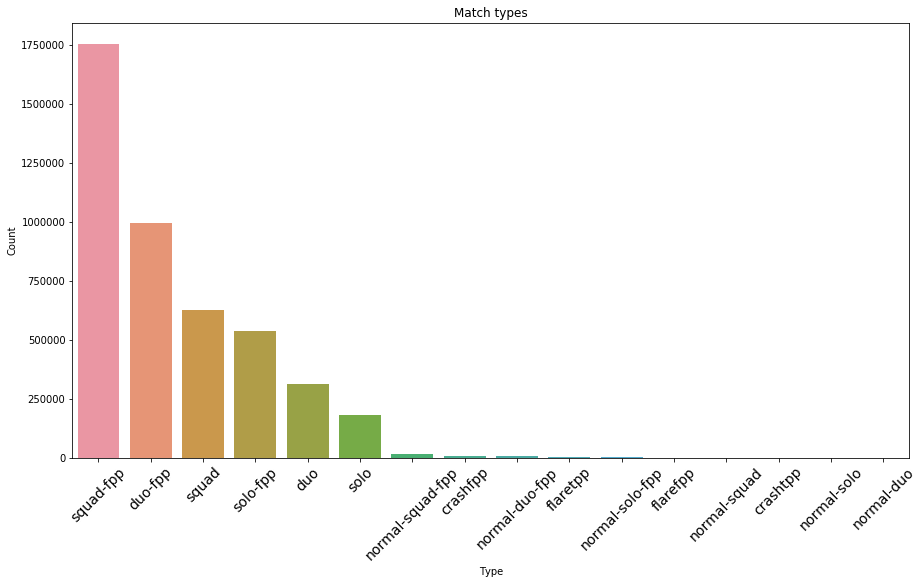

In [10]:
plt.figure(figsize=(15,8))
ticks = m_types.Type.values
ax = sns.barplot(x="Type", y="Count", data=m_types)
ax.set_xticklabels(ticks, rotation=45, fontsize=14)
ax.set_title("Match types")
plt.show()

The graph above shows that the most popular game modes are squad and duo. Next I will aggregate all these individual types into three main categories (squad, duo and solo).

In [11]:
m_types2 = train.loc[:,"matchType"].value_counts().to_frame()
aggregated_squads = m_types2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
aggregated_duos = m_types2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
aggregated_solo = m_types2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
aggregated_mt = pd.DataFrame([aggregated_squads,aggregated_duos,aggregated_solo], index=["squad","duo","solo"], columns =["count"])
aggregated_mt

,count
squad,2400402
duo,1315970
solo,720713


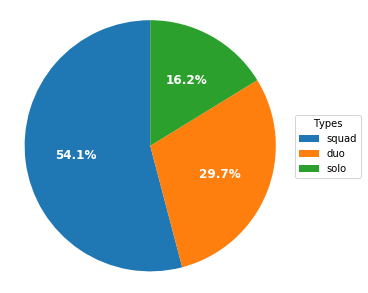

In [12]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['squad', 'duo', 'solo']

wedges, texts, autotexts = ax1.pie(aggregated_mt["count"],textprops=dict(color="w"), autopct='%1.1f%%', startangle=90)

ax1.axis('equal')
ax1.legend(wedges, labels,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.show()

The pie chart above shows that over 54% of all the matches was played in squad mode.

### b) Kills and damage dealt [^](#4) <a id="4"></a> <br>

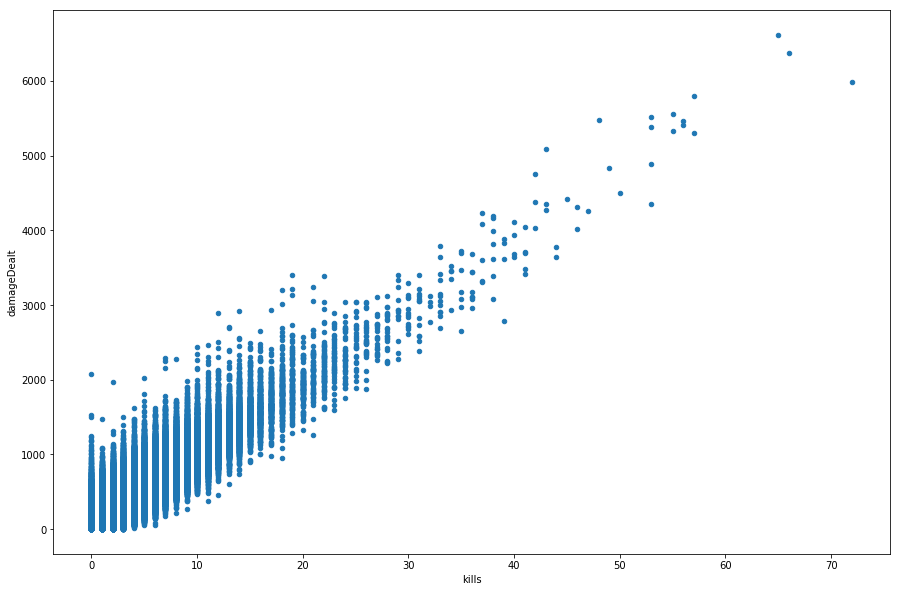

In [13]:
train.plot(x="kills",y="damageDealt", kind="scatter", figsize = (15,10))
plt.show()

There is an obvious correlation between number of kills and damage dealt. We see also that there are some outliers. The maximum kills is 60 which is much bigger than the wast majority of players get.

Now let's see what are the distances at which enemies were killed.


Let's look at our kills master:

In [14]:
train[train['kills']>60]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
334400,810f2379261545,7f3e493ee71534,f900de1ec39fa5,20,0,6616.0,0,13,5,1,...,0,0.0,0,0.0,0,0,1036.0,60,0,1.0
1248348,80ac0bbf58bfaf,1e54ab4540a337,08e4c9e6c033e2,5,0,6375.0,0,21,4,1,...,0,0.0,0,0.0,0,0,1740.0,23,0,1.0
3431247,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,1,...,0,0.0,0,0.0,0,0,728.1,35,0,1.0


There is an obvious correlation between number of kills and damage dealt. We see also that there are some outliers. The maximum kills is 60 which is much bigger than the wast majority of players get.

Now let's see at headshoots statistics as this is one of the most satisfying thing you can score during a game. Players without any headshoot kills are filtered out.

Maximum number of headshots that the player scored: 64


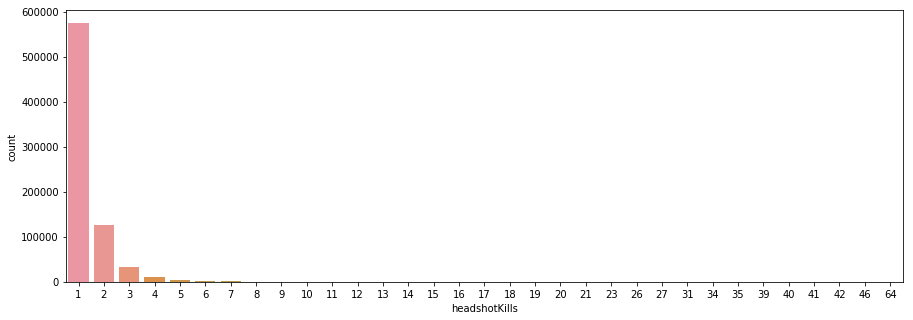

In [15]:
headshots = train[train['headshotKills']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['headshotKills'].sort_values())
print("Maximum number of headshots that the player scored: " + str(train["headshotKills"].max()))

DBNO - Down But Not Out. How many enemies DBNOs an average player scores.

Mean number of DBNOs that the player scored: 0.6578755043326169


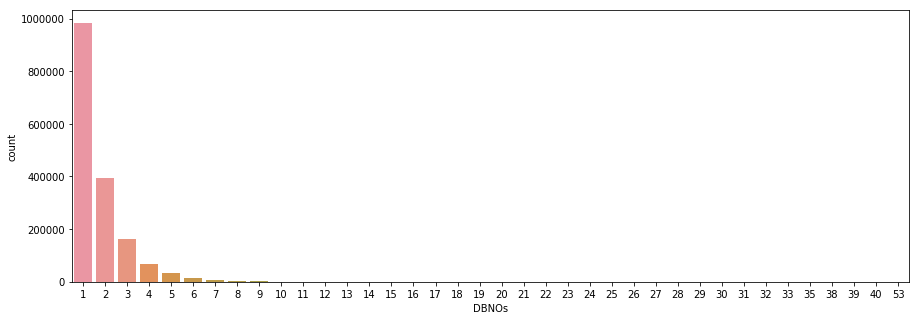

In [16]:
headshots = train[train['DBNOs']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['DBNOs'].sort_values())
print("Mean number of DBNOs that the player scored: " + str(train["DBNOs"].mean()))

Is there a correlation between DBNOs and kills?

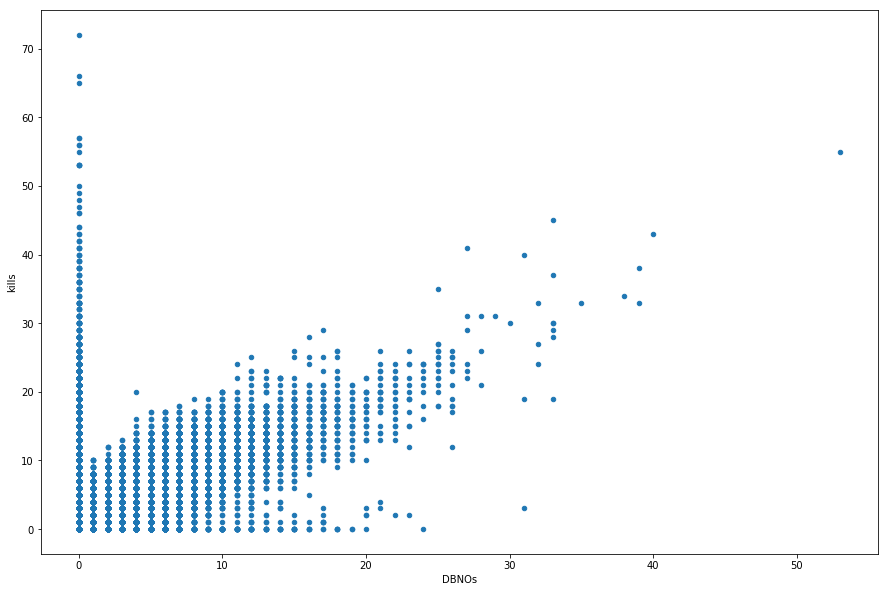

In [17]:
train.plot(x="DBNOs",y="kills", kind="scatter", figsize = (15,10))
plt.show()

It seems that DBNOs are correlated with kills. That makes sense as usually if player is not killed by headshoot yu have to finish him while he's in DBNO state.

### c) Maximum distances [^](#5) <a id="5"></a> <br>
Range is filtered to a resonable kill distance, e.g. 200 meters. To give you the feeling about distances in the game I prepared a small comparison in the picture below. On the left side the building I'm aiming at is approximately 100m away, on the right side around 200m.

![Imgur](https://i.imgur.com/js8kQpU.jpg)

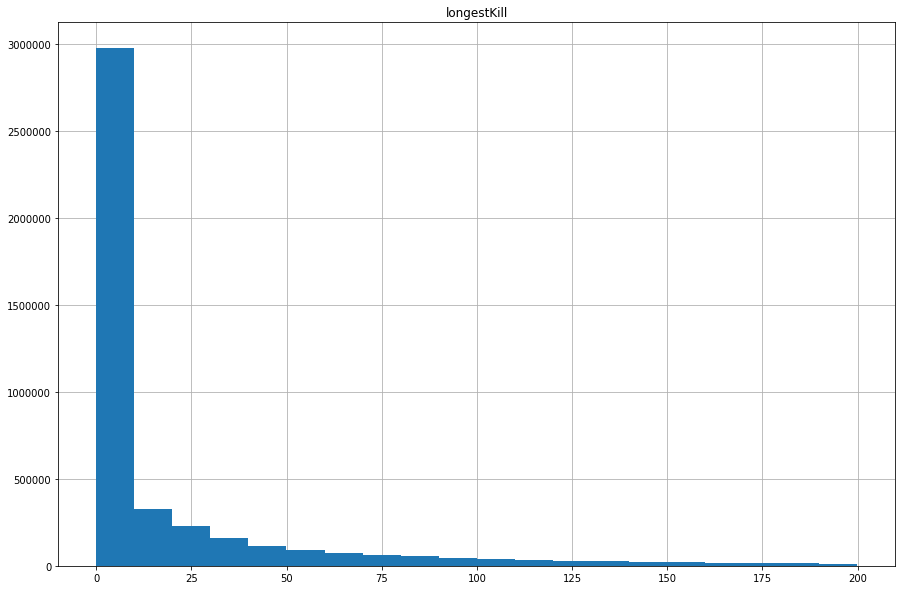

In [18]:
dist = train[train['longestKill']<200]
plt.rcParams['axes.axisbelow'] = True
dist.hist('longestKill', bins=20, figsize = (15,10))
plt.show()

In [19]:
print("Average longest kill distance a player achieve is {:.1f}m, 95% of them not more than {:.1f}m and a maximum distance is {:.1f}m." .format(train['longestKill'].mean(),train['longestKill'].quantile(0.95),train['longestKill'].max()))

Average longest kill distance a player achieve is 23.0m, 95% of them not more than 126.1m and a maximum distance is 1094.0m.


Longest kill of 1094m seems a bit unrealistic (cheater?) but from another side with a 8x scope, a static target, very good position and a lot of luck it is possible.

To get a scale the entire Miramar map is 8x8km and 1300 meters is about like shooting from La Bendita crater to Impala city. Below the picture showing this in practice.
![Imgur](https://i.imgur.com/7WzRzkQ.jpg)

### d) Driving vs. Walking [^](#6) <a id="6"></a> <br>
I filtered data to exclude for players who don't ride at all and don't walk.     

In [20]:
walk0 = train["walkDistance"] == 0
ride0 = train["rideDistance"] == 0
swim0 = train["swimDistance"] == 0
print("{} of players didn't walk at all, {} players didn't drive and {} didn't swim." .format(walk0.sum(),ride0.sum(),swim0.sum()))

99603 of players didn't walk at all, 3309429 players didn't drive and 4157694 didn't swim.


Above numbers indicate that there is a significant number of players who didn't walk at all. We should think how to interpret these record. It is obvious that you have to walk just a little bit in order to play this game (to get to a car at least). Are this disconnected players? If yes they shouldn't score any points. Let's check this.

Average place of non-walking players is 0.044, minimum is 0.0 and the best is 1.0, 95% of players has a score below 0.25.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed96859ba8>]],
      dtype=object)

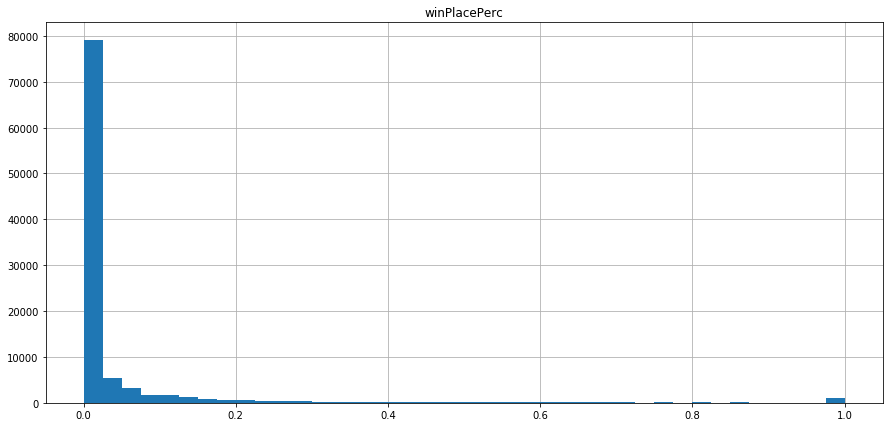

In [21]:
walk0_rows = train[walk0]
print("Average place of non-walking players is {:.3f}, minimum is {} and the best is {}, 95% of players has a score below {}." 
      .format(walk0_rows["winPlacePerc"].mean(), walk0_rows["winPlacePerc"].min(), walk0_rows["winPlacePerc"].max(),walk0_rows["winPlacePerc"].quantile(0.95)))
walk0_rows.hist('winPlacePerc', bins=40, figsize = (15,7))

As we see most of the non-walking players score only last places. However, few of them got better places and a few even the top ones. This may be indication of presence of famous **cheaters**! Let's print couple of suspicious row.

In [22]:
suspects = train.query('winPlacePerc ==1 & walkDistance ==0').head()
suspects.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3702,3fc123559fc935,5cef1df7ee3551,01aead02bb8901,0,0,0.0000,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,3,0,1.0
8790,106afdb574db25,4b0ae4659e9936,cf0cb51c829eb5,0,0,0.0000,0,0,0,2,...,0,0.0,0,0.0,0,0,0.0,1,0,1.0
9264,0351565a7058e9,3663a93a319725,3659fe3694262a,0,0,0.3218,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,9,0,1.0
18426,e6d6f94558dd2f,22818b9a9a6159,486200c5613f14,0,1,0.0000,0,0,0,2,...,0,0.0,0,0.0,0,0,0.0,6,0,1.0
19054,d0683f5d780f09,faebf5c484de4a,ec9a90395ed8c0,0,0,99.0000,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,9,0,1.0


In [23]:
print("Maximum ride distance for suspected entries is {:.3f} meters, and swim distance is {:.1f} meters." .format(suspects["rideDistance"].max(), suspects["swimDistance"].max()))

Maximum ride distance for suspected entries is 0.000 meters, and swim distance is 0.0 meters.


Interestingly, all of the columns connected to travelling are zero.

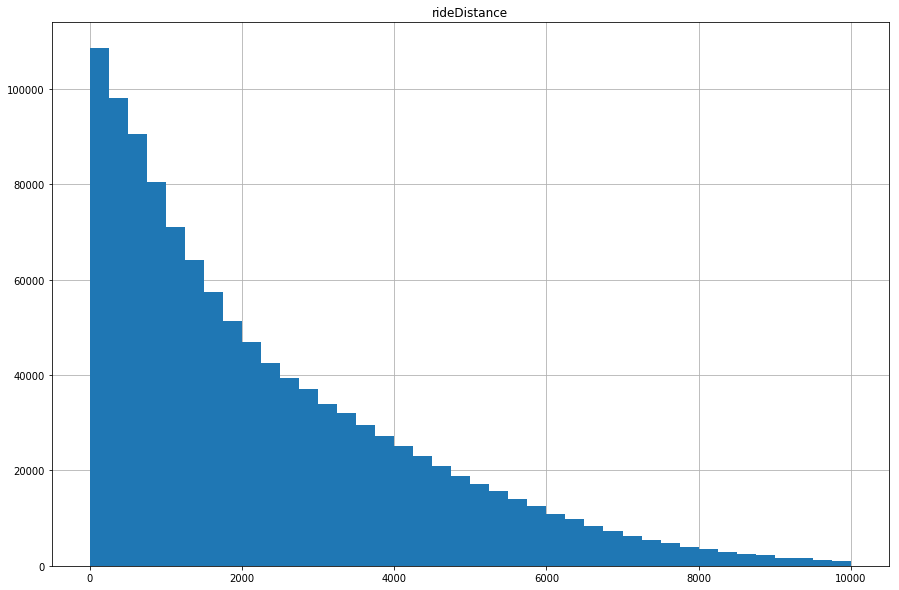

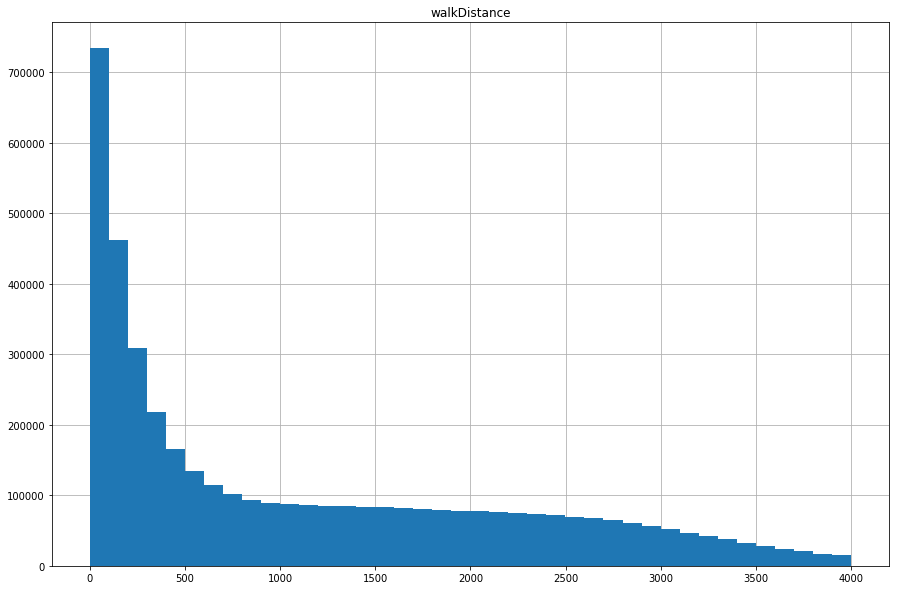

In [24]:
ride = train.query('rideDistance >0 & rideDistance <10000')
walk = train.query('walkDistance >0 & walkDistance <4000')
ride.hist('rideDistance', bins=40, figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10))
plt.show()

Plots above show that players mostly walk during a game. That's obvious when you think that vehicles are usually used just to loot more locations and to get a more strategic positions for attack and defend.

Now let's create a sum of walking, driving and swimming distances for each row.

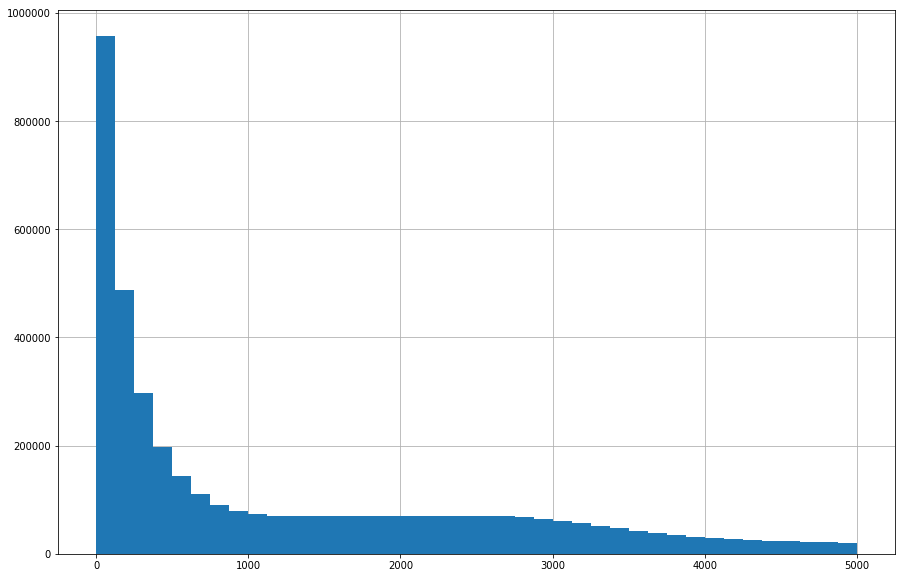

In [25]:
travel_dist = train["walkDistance"] + train["rideDistance"] + train["swimDistance"]
travel_dist = travel_dist[travel_dist<5000]
travel_dist.hist(bins=40, figsize = (15,10))

### e) Weapons acquired [^](#7) <a id="7"></a> <br>

Average number of acquired weapons is 3.660, minimum is 0 and the maximum 236, 99% of players acquired less than weapons 10.0.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed3a00c6a0>]],
      dtype=object)

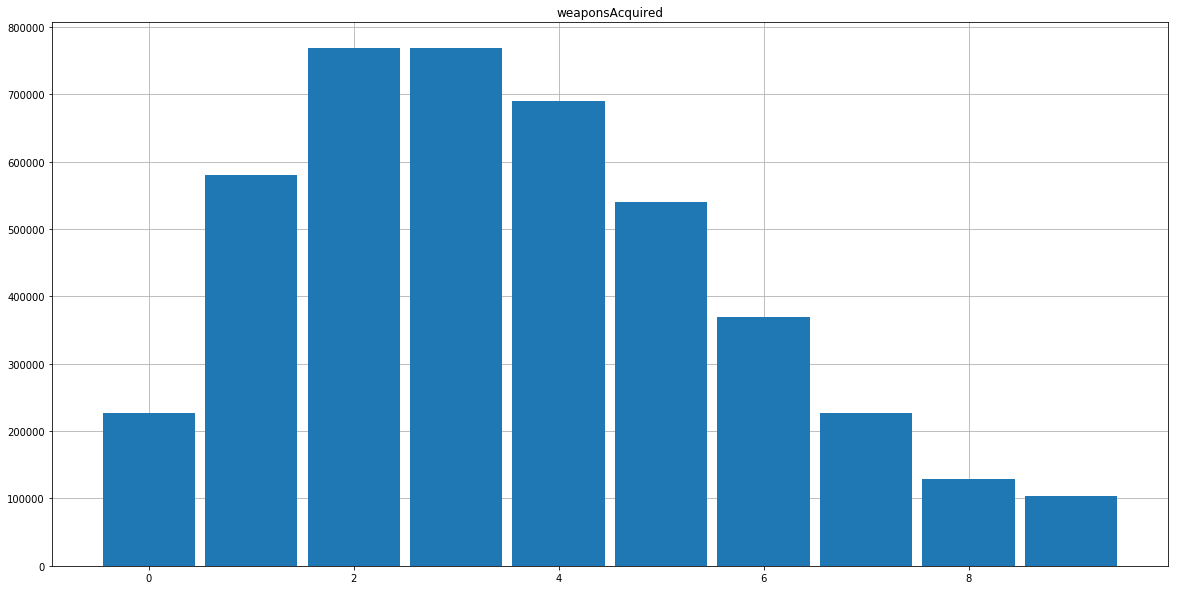

In [26]:
print("Average number of acquired weapons is {:.3f}, minimum is {} and the maximum {}, 99% of players acquired less than weapons {}." 
      .format(train["weaponsAcquired"].mean(), train["weaponsAcquired"].min(), train["weaponsAcquired"].max(), train["weaponsAcquired"].quantile(0.99)))
train.hist('weaponsAcquired', figsize = (20,10),range=(0, 10), align="left", rwidth=0.9)

### f) Correlation map [^](#8) <a id="8"></a> <br>

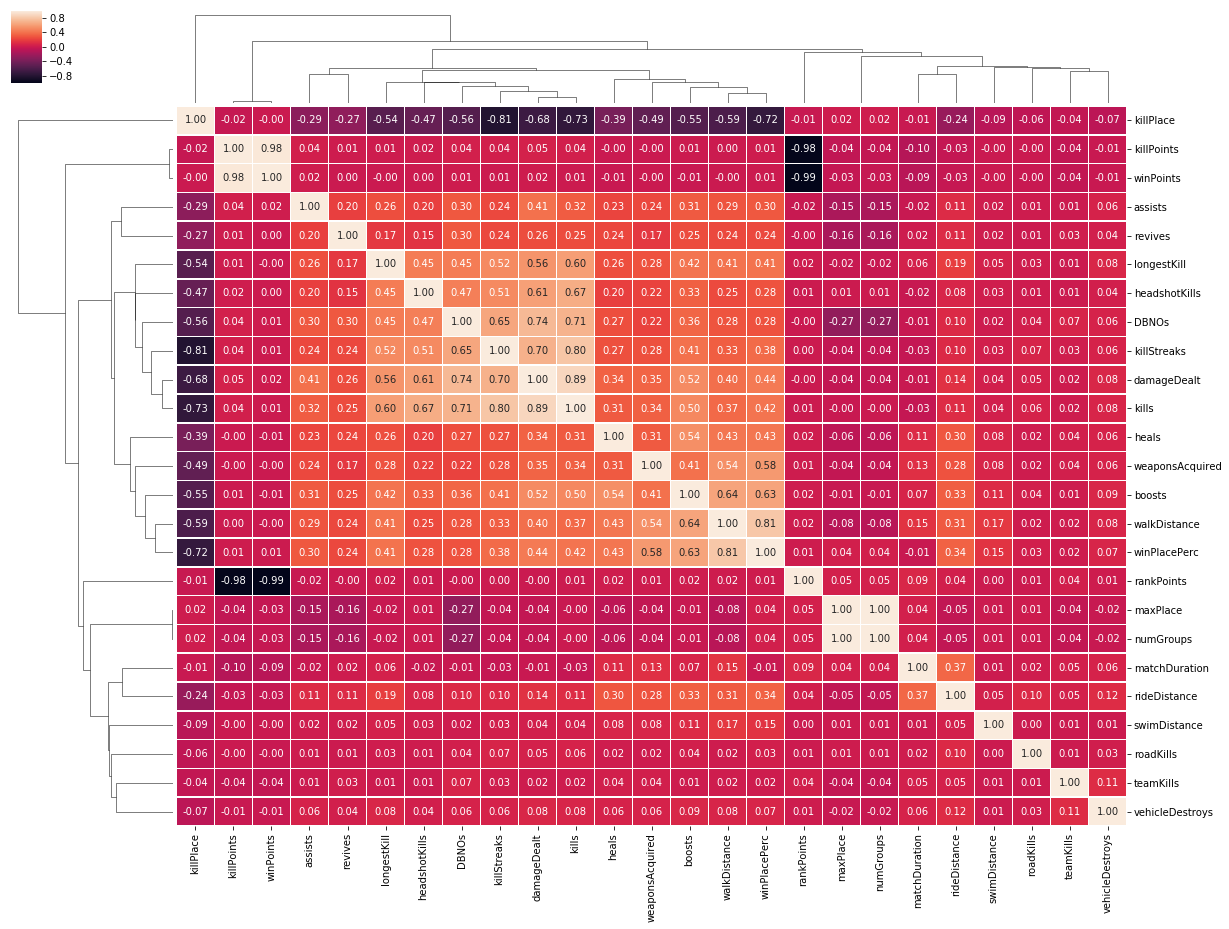

In [27]:
ax = sns.clustermap(train.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(20, 15))
plt.show()

## 3-Analysis of TOP 10% of players [^](#9) <a id="9"></a> <br>

TOP 10% overview

Average number of kills: 2.6
Minimum: 0
The best: 72
95% of players within: 8.0 kills.


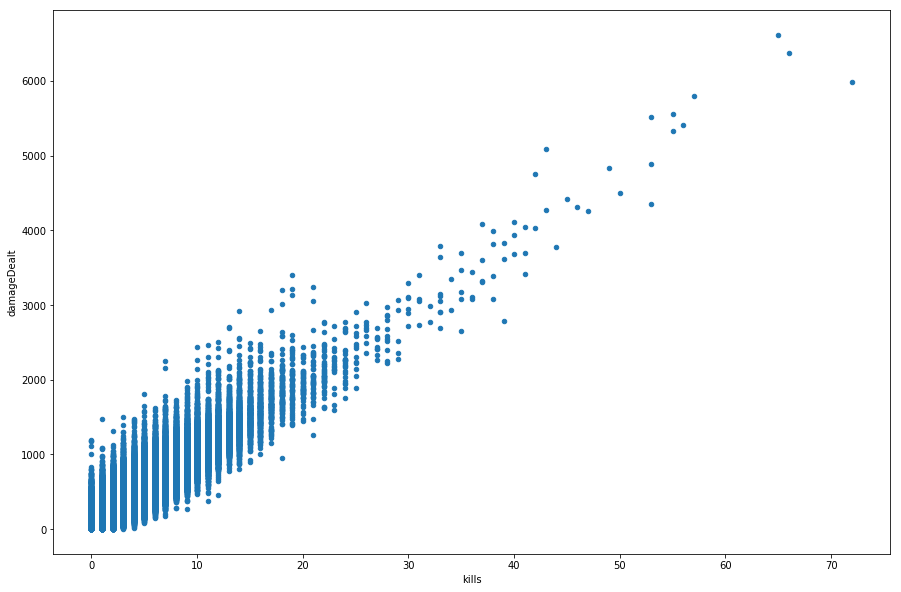

In [28]:
top10 = train[train["winPlacePerc"]>0.9]
print("TOP 10% overview\n")
print("Average number of kills: {:.1f}\nMinimum: {}\nThe best: {}\n95% of players within: {} kills." 
      .format(top10["kills"].mean(), top10["kills"].min(), top10["kills"].max(),top10["kills"].quantile(0.95)))

top10.plot(x="kills", y="damageDealt", kind="scatter", figsize = (15,10))

Let's see their way of travelling and comare this to the overall population.

Average walking distance: 2813.5134925205784


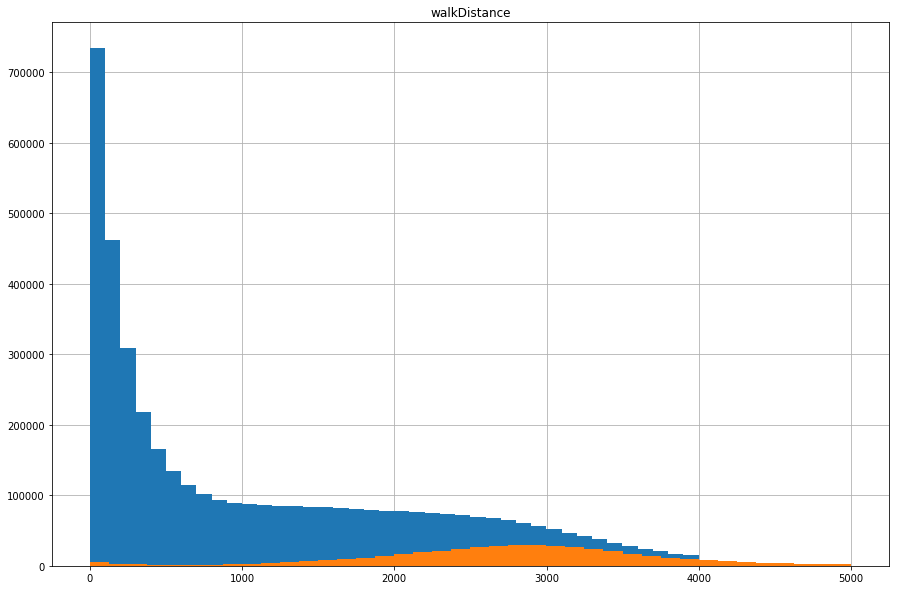

In [29]:
fig, ax1 = plt.subplots(figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10), ax = ax1)
walk10 = top10[top10['walkDistance']<5000]
walk10.hist('walkDistance', bins=40, figsize = (15,10), ax = ax1)

print("Average walking distance: " + str(top10['walkDistance'].mean()))

Average riding distance: 1392.0857815081788


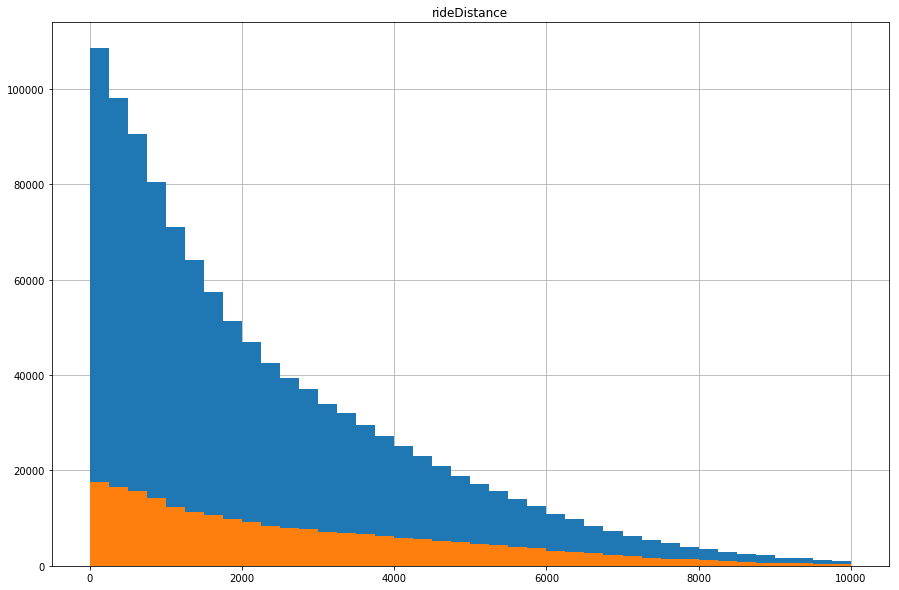

In [30]:
fig, ax1 = plt.subplots(figsize = (15,10))
ride.hist('rideDistance', bins=40, figsize = (15,10), ax = ax1)
ride10 = top10.query('rideDistance >0 & rideDistance <10000')
ride10.hist('rideDistance', bins=40, figsize = (15,10), ax = ax1)
print("Average riding distance: " + str(top10['rideDistance'].mean()))

What about the longest distances at which they scored their kills?

In [31]:
print("On average the best 10% of players have the longest kill at {:.3f} meters, and the best score is {:.1f} meters." .format(top10["longestKill"].mean(), top10["longestKill"].max()))

On average the best 10% of players have the longest kill at 75.048 meters, and the best score is 1094.0 meters.


Let's see now the correlations between the variables

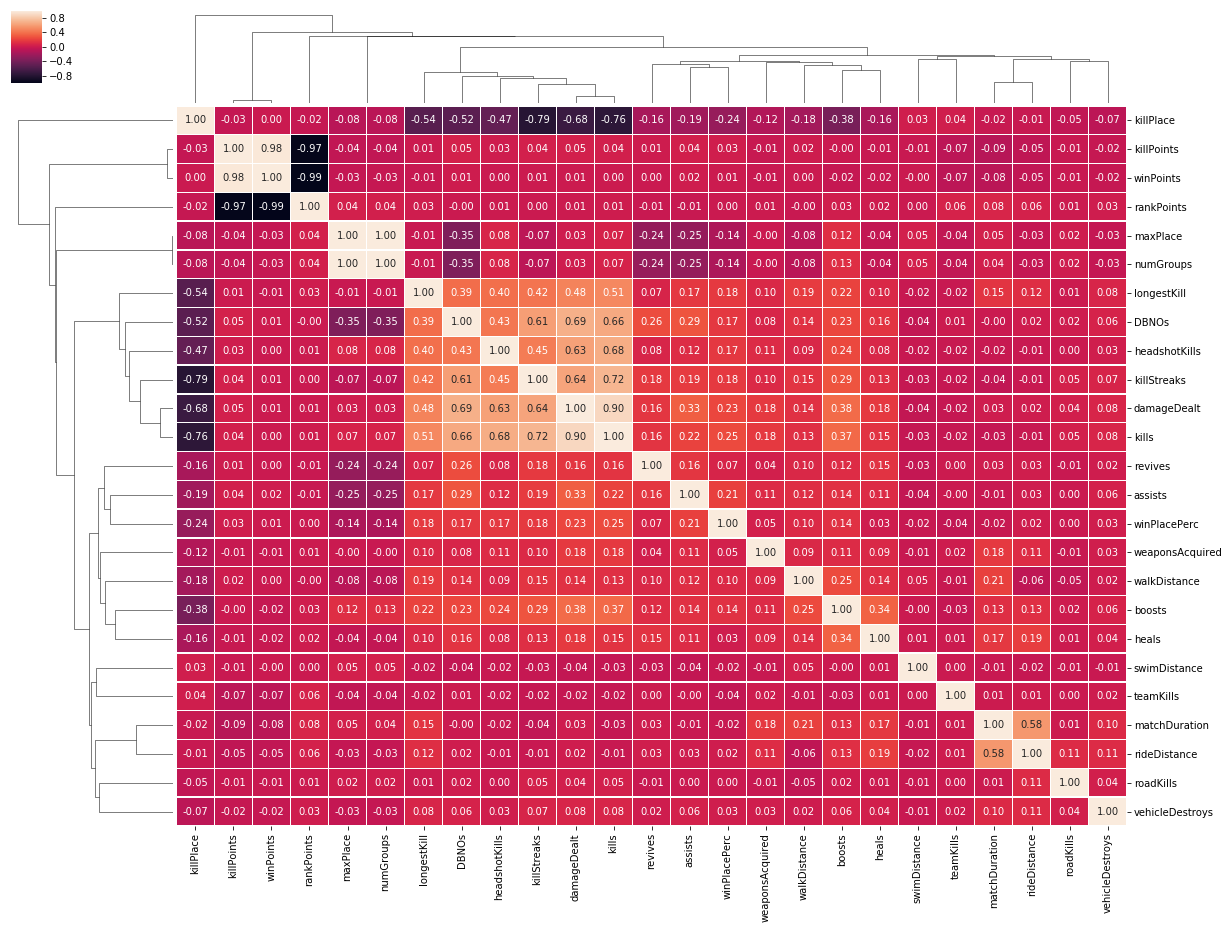

In [32]:
ax = sns.clustermap(top10.corr(), annot=True, linewidths=.5, fmt= '.2f', figsize=(20, 15))
plt.show()

Comparison of both clustertmap, for all and TOP 10% shows that the same columns seems to be of significant importance (I assume above 0.6 or below -0.6):
* rankPoints vs killPoints
* kills vs. damage dealt/DBNOs/headshotKills/killPlace
* killStreaks vs. damageDealt/killPlace/kills
* longestKill vs. damageDealt/kills
* walkDistance vs. killPlace
* winPoints vs. killPonts/rankPoints
* winPlacePerc vs. boosts/killPlace/walkDistance/weaponsAquired